In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
AIR_DF = pd.read_csv(
    "C:/Users/admin/Masters-s-project/masters_project/machine_learning/data_analysis/air_pollution_smog_clear.csv",
    index_col="date",
    parse_dates=True,
)
# df.index.freq='MS'

In [41]:
def pop_columns(df):

    indexes = ["entry_id", "PM1", "PM2.5", "PM10", "temp", "pressure", "humidity"]

    pm1_pop = [i for i in indexes if i != "PM1"]
    pm2_5_pop = [i for i in indexes if i != "PM2_5"]
    pm10_pop = [i for i in indexes if i != "PM10"]
    temp_pop = [i for i in indexes if i != "temp"]
    press_pop = [i for i in indexes if i != "pressure"]
    hum_pop = [i for i in indexes if i != "humidity"]

    df_pm1_pop = pd.DataFrame()
    df_pm2_5 = pd.DataFrame() 
    df_pm_10 = pd.DataFrame()
    df_temp =  pd.DataFrame()
    df_press = pd.DataFrame() 
    df_hum_pop = pd.DataFrame()

    pops = [pm1_pop, pm2_5_pop, pm10_pop, temp_pop, press_pop, hum_pop]

    finnaly_pops = [df_pm1_pop, df_pm2_5, df_pm_10, df_temp, df_press, df_hum_pop,]


    _finnaly_pops = []

    for i in range(len(pops)):
        print(pops[i])
        _finnaly_pops.append(df[i])

    # return finnaly_pops

pop_columns(AIR_DF)

['entry_id', 'PM2.5', 'PM10', 'temp', 'pressure', 'humidity']


KeyError: 0

In [25]:
df.head()

,entry_id,PM1,PM2.5,PM10,temp,pressure,humidity
date,,,,,,,
2021-11-12 20:30:17,1,0.0,0.0,0.0,26.47,1022.04517,39.31152
2021-11-12 20:30:35,2,22.0,33.0,38.0,26.67,1022.39905,39.24609
2021-11-12 20:30:52,3,23.0,35.0,44.0,26.69,1022.33557,39.18848
2021-11-12 20:31:10,4,25.0,39.0,48.0,26.71,1022.28021,39.74805
2021-11-12 20:31:41,5,24.0,38.0,45.0,26.73,1022.37970,39.12109


<AxesSubplot:xlabel='date'>

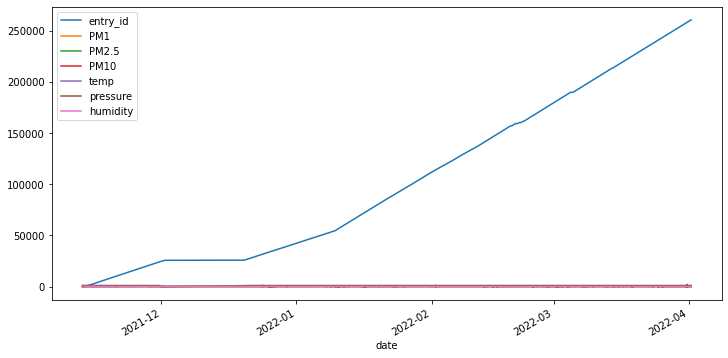

In [4]:
df.plot(figsize=(12, 6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
results = seasonal_decompose(df["PM1"])
results.plot()

ValueError: This function does not handle missing values

In [ ]:
len(df)

260383

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
df.head(), df.tail()

(                      PM1
 date                     
 2021-11-12 20:30:17   0.0
 2021-11-12 20:30:35  22.0
 2021-11-12 20:30:52  23.0
 2021-11-12 20:31:10  25.0
 2021-11-12 20:31:41  24.0,
                       PM1
 date                     
 2022-04-01 13:48:50  29.0
 2022-04-01 13:49:26  17.0
 2022-04-01 13:50:01  24.0
 2022-04-01 13:50:34  22.0
 2022-04-01 13:51:16  22.0)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.        ],
       [0.59459459],
       [0.62162162],
       [0.67567568],
       [0.64864865],
       [0.64864865],
       [0.62162162],
       [0.62162162],
       [0.62162162],
       [0.59459459]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
X, y = generator[0]
print(f"Given the Array: \n{X.flatten()}")
print(f"Predict this y: \n {y}")

Given the Array: 
[0.         0.59459459 0.62162162]
Predict this y: 
 [[0.67567568]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(
    scaled_train, scaled_train, length=n_input, batch_size=1
)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation="relu", input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator, epochs=50)

Epoch 1/50
144/144 [==============================] - 5s 29ms/step - loss: 0.0911
Epoch 2/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0389
Epoch 3/50
144/144 [==============================] - 4s 31ms/step - loss: 0.0374
Epoch 4/50
144/144 [==============================] - 4s 30ms/step - loss: 0.0338
Epoch 5/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0333
Epoch 6/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0380
Epoch 7/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0309
Epoch 8/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0307
Epoch 9/50
144/144 [==============================] - 4s 29ms/step - loss: 0.0325
Epoch 10/50
144/144 [==============================] - 4s 30ms/step - loss: 0.0298
Epoch 11/50
144/144 [==============================] - 4s 27ms/step - loss: 0.0278
Epoch 12/50
144/144 [==============================] - 4s 27ms/step - loss: 0.0310
Epoch 13/50
1

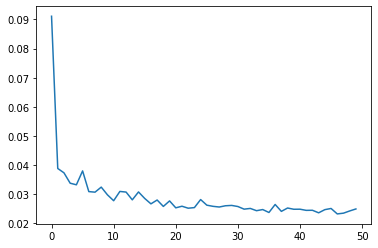

In [ ]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 167ms/step


array([[1.0508027]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test_predictions

[array([0.6157319], dtype=float32),
 array([0.5925479], dtype=float32),
 array([0.7672322], dtype=float32),
 array([0.8408352], dtype=float32),
 array([0.9531361], dtype=float32),
 array([0.9373985], dtype=float32),
 array([0.8562658], dtype=float32),
 array([0.74841475], dtype=float32),
 array([0.64220357], dtype=float32),
 array([0.6052617], dtype=float32),
 array([0.56225556], dtype=float32),
 array([0.5900758], dtype=float32)]

In [ ]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test["Predictions"] = true_predictions

C:\Users\admin\AppData\Local\Temp\ipykernel_22468\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

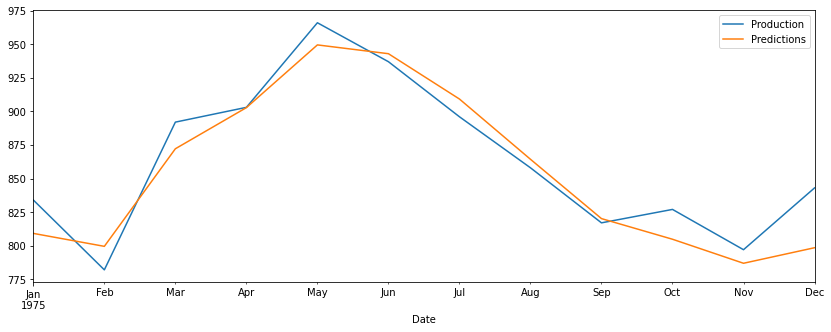

In [ ]:
test.plot(figsize=(14, 5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test["PM1"], test["Predictions"]))
print(rmse)

19.208747555149632
